In [13]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import io

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Google Sheet File ID
file_id = '1k2lMB3daFxY1F2h3r8WhXlG-oLkxV33oZrOaG1ojiJg'  # replace with your file ID

# Create the file object using the file ID
file_obj = drive.CreateFile({'id': file_id})

# Get the content of the file as CSV (specifying the MIME type)
file_obj.GetContentFile('downloaded_file.csv', mimetype='text/csv')

# Load the CSV file into a DataFrame
df = pd.read_csv('downloaded_file.csv')

# Display the first few rows of the DataFrame
print(df.head())


           City  Total Population  Median Age  Percent White  Percent Black  Percent Hispanic  Percent Asian  Median Household Income  Median Home Value  Average Rent  Homeownership Rate  Unemployment Rate
0  Redwood City             85000        36.5             60              5                25             10                    90000            1100000          2500                  55                3.5
1     San Mateo            105000        37.2             55              3                30             12                   110000            1400000          2800                  60                3.2
2    Burlingame             31000        39.4             70              2                18             10                   120000            1500000          2700                  65                2.8
3     Daly City            107000        34.1             40              6                35             19                    80000             950000          2200          

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

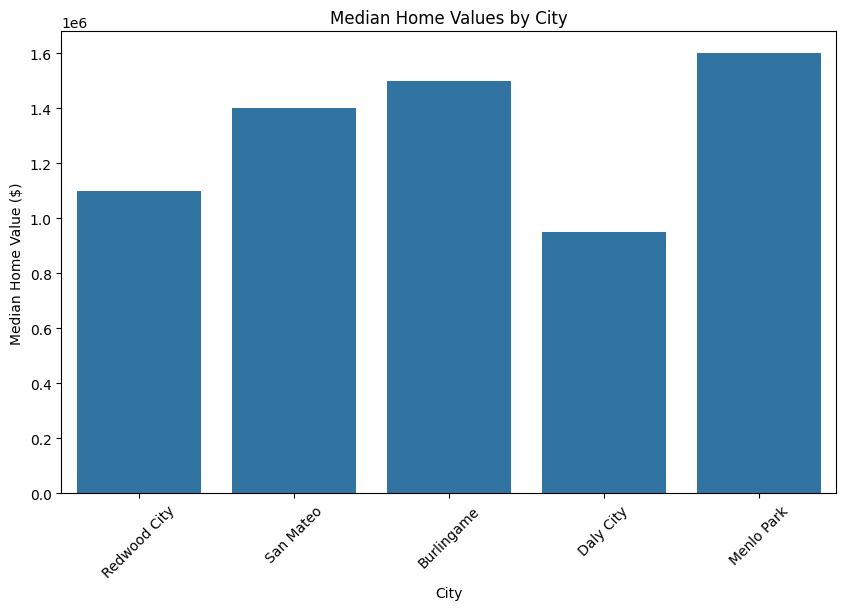

In [15]:
#Create a bar plot to visualize the median home values by city

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Median Home Value', data=df)
plt.title('Median Home Values by City')
plt.ylabel('Median Home Value ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


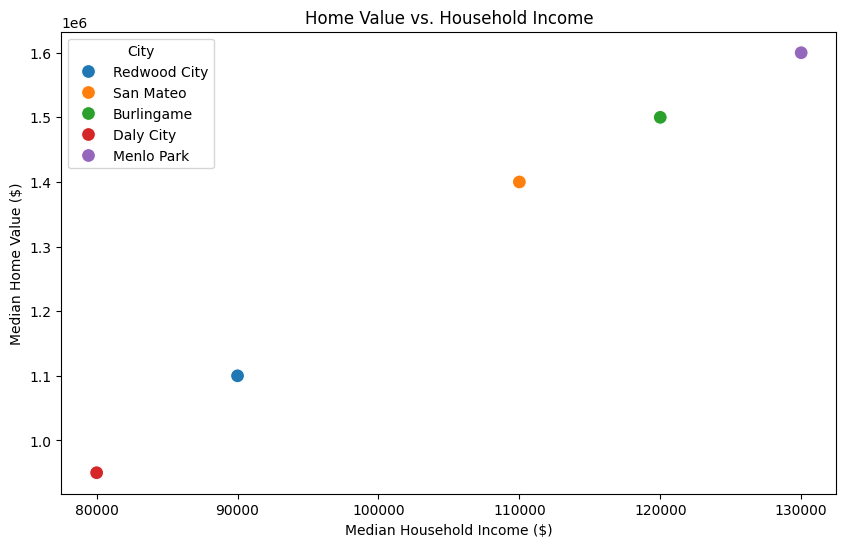

In [16]:
#Create scatter plot of medium home value vs median household income

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Median Household Income', y='Median Home Value', data=df, hue='City', s=100)
plt.title('Home Value vs. Household Income')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Median Home Value ($)')
plt.show()


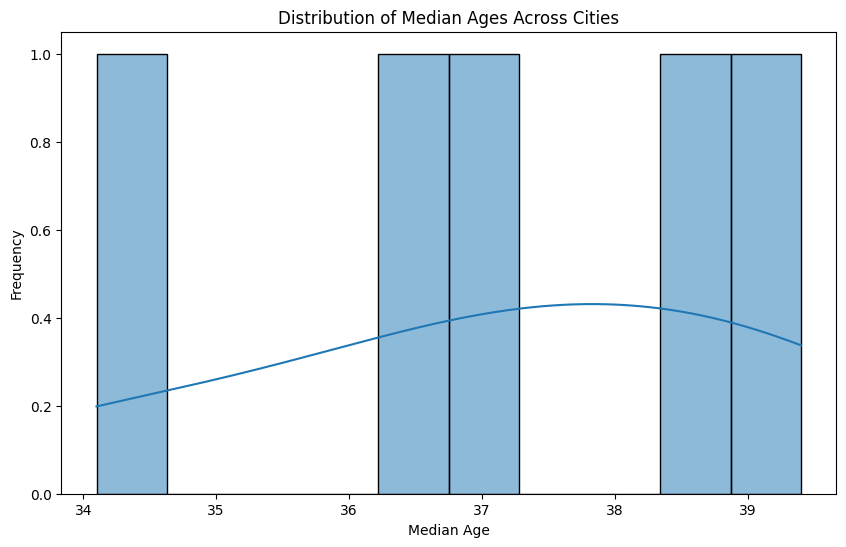

In [17]:
# create histogram of median ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Median Age'], bins=10, kde=True)
plt.title('Distribution of Median Ages Across Cities')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.show()


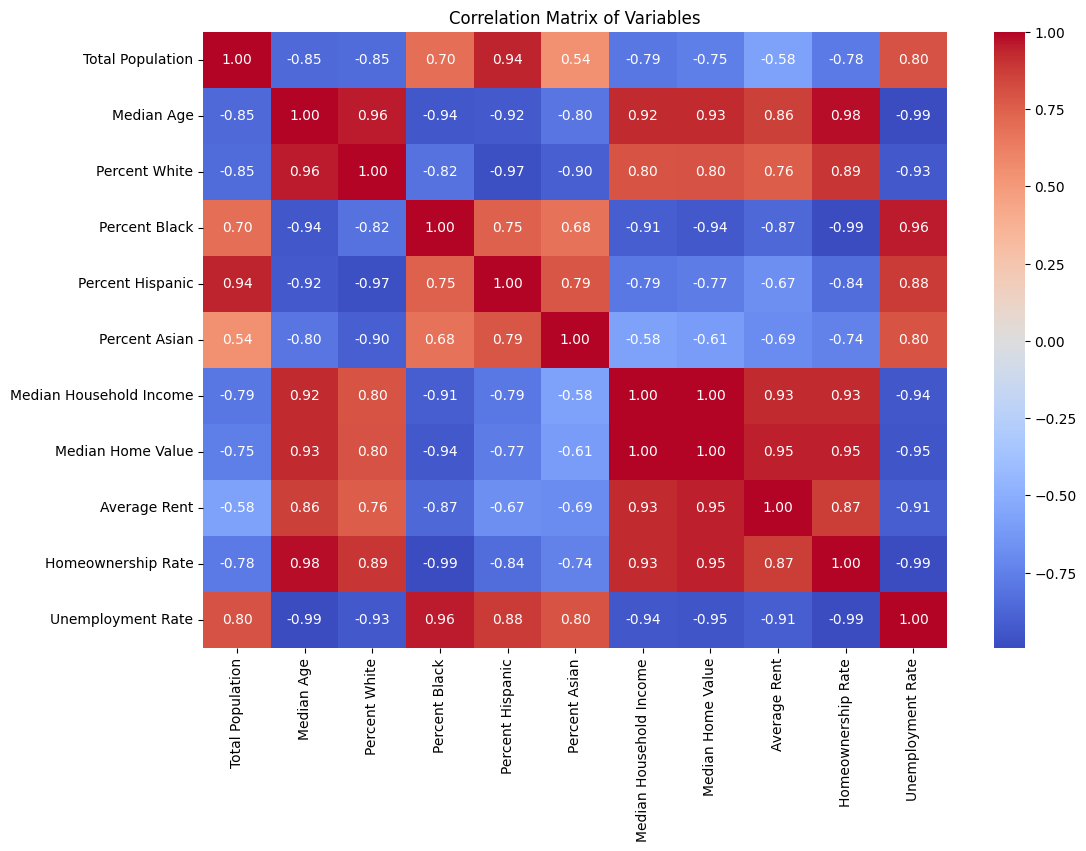

In [18]:
#select only numeric columns for corr
numeric_df = df.select_dtypes(include=[np.number])

# Create heatmap of correlation matrix for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


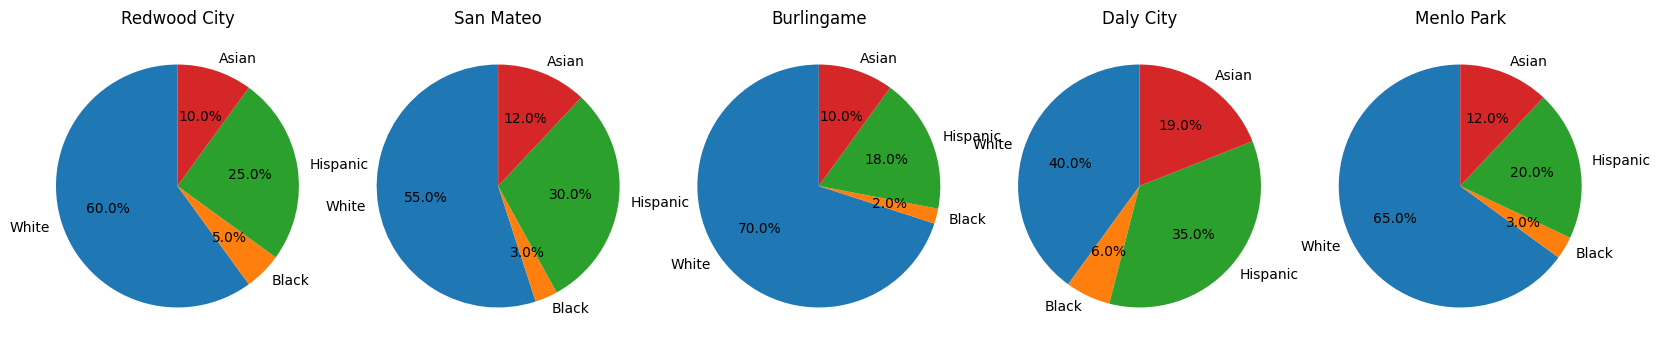

In [19]:
# create pie chart of racial/ethinic composition
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, city in enumerate(df['City']):
    ax = axes[i]
    labels = ['White', 'Black', 'Hispanic', 'Asian']
    sizes = [df.loc[i, 'Percent White'], df.loc[i, 'Percent Black'], df.loc[i, 'Percent Hispanic'], df.loc[i, 'Percent Asian']]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(city)
plt.show()
